In [5]:
import matplotlib.pyplot as plt
import os
import shutil
import torch
import torchvision.datasets as dset
import torch.utils.data
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms


Text(0.5, 1.0, '(662, 280, 3)')

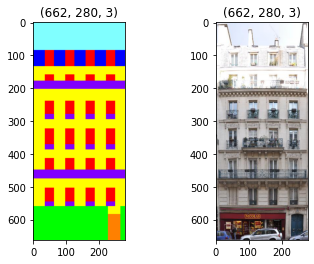

In [6]:
input_image = plt.imread("./data/input_images/monge_5.png")
ground_truth = plt.imread("./data/ground_truth/monge_5.jpg")

plt.figure
plt.subplot(121)
plt.imshow(input_image)
plt.title(input_image.shape)
plt.subplot(122)
plt.imshow(ground_truth)
plt.title(ground_truth.shape)

In [12]:
def remove_not_annoted_images():
    input_images_fold = os.listdir("./data/input_images")
    ground_truth_fold = os.listdir("./data/ground_truth")
    
    not_annoted_images = [fg for fg in ground_truth_fold if fg[:-3] not in [fi[:-3] for fi in input_images_fold]]
    
    if(not os.path.exists("./data/not_annoted_images")):
        os.mkdir("./data/not_annoted_images")
        
    for f in not_annoted_images:
        shutil.move("./data/ground_truth/"+f,"./data/not_annoted_images/"+f)

#remove_not_annoted_images()

def rename_gt_images():
    #rename and convert ground truth images to png
    input_images_fold = os.listdir("./data/input_images")
    ground_truth_fold = os.listdir("./data/ground_truth")
    
    for f_name in (ground_truth_fold):
        os.rename("./data/ground_truth/" + f_name, "./data/ground_truth/" +f_name[:-4] + ".png")

#rename_gt_images()
    

## Preprocessing

In [ ]:
#Custom dataset inherit from Dataset

class Pix2PixDataset(Dataset):
    def __init__(self, input_img_dir, grd_truth_dir, transform=None):
        self.input_img_dir = input_img_dir
        self.grd_truth_dir = grd_truth_dir
        self.img_names = os.listdir(input_img_dir)
        self.transform = transform

    def __len__(self):
        return len(self.img_names)

    def __getitem__(self, idx):
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

In [3]:
BATCH_SIZE= 1
IMG_SIZE = 256
IMG_SIZE_BF_CROP = 286
WORKERS = 2

def pre_processing(input_images_fold, ground_truth_fold):
    input_dataset = dset.ImageFolder(root=input_images_fold,
                           transform=transforms.Compose([
                               transforms.Resize(IMG_SIZE_BF_CROP),
                               transforms.RandomCrop(IMG_SIZE),
                               transforms.ToTensor(),
                               transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                               #normalize the three channels to [-1:1]
                           ]))
    gt_dataset = dset.ImageFolder(root=ground_truth_fold,
                           transform=transforms.Compose([
                               transforms.Resize(IMG_SIZE_BF_CROP),
                               transforms.RandomCrop(IMG_SIZE),
                               transforms.ToTensor(),
                               transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                               #normalize the three channels to [-1:1]
                           ]))
    
#     input_dataloader = torch.utils.data.DataLoader(input_dataset, batch_size=BATCH_SIZE,
#                                          shuffle=True, num_workers=WORKERS)
    
#     gt_dataloader = torch.utils.data.DataLoader(gt_dataset, batch_size=BATCH_SIZE,
#                                          shuffle=True, num_workers=WORKERS)
    
    return input_dataset, gt_dataset

input_dataloader, gt_dataloader = pre_processing("./data/input_images", "./data/ground_truth")
    

FileNotFoundError: Couldn't find any class folder in ./data/input_images.